In [ ]:
import os
import pandas as pd

labels_folder = r"C:\Users\AHMED\Desktop\object tracking\vehicle-detection-3\test\labels"

data = []
for file in os.listdir(labels_folder):
    if file.endswith(".txt"):
        with open(os.path.join(labels_folder, file), "r") as f:
            for line in f.readlines():
                values = line.strip().split()
                if len(values) < 2:      # not valid
                    continue
                try:
                    class_id = int(float(values[0]))  # handles 0, 01, 0.0
                except:
                    continue

                # Bounding box format → 5 columns
                if len(values) == 5:
                    x, y, w, h = map(float, values[1:])
                    data.append([file[:-4], class_id, x, y, w, h])

                # Segmentation format → >5 columns
                elif len(values) > 5:
                    # bounding box is not present → mark area as NaN
                    data.append([file[:-4], class_id, None, None, None, None])

df = pd.DataFrame(data, columns=["image", "class_id", "x_center", "y_center", "width", "height"])

print("Total images:", df['image'].nunique())
print("Total annotations:", len(df))
print("Total classes detected:", df['class_id'].nunique())
print("Classes found:", sorted(df['class_id'].unique()))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\AHMED\\Dataset\\labels'

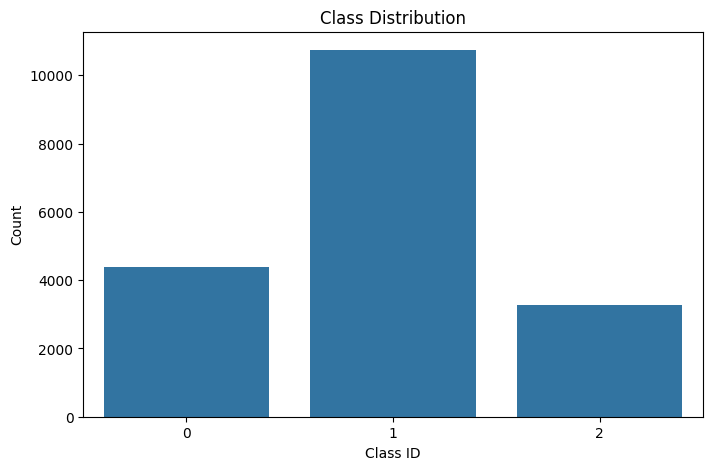

In [2]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="class_id")
plt.title("Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZpL1sRtawnJnuup8XTql")
project = rf.workspace("guava-segmentation").project("vehicle_detecton-k9s7b")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicle_detecton-4 in yolov11:: 100%|██████████| 11104/11104 [00:02<00:00, 5535.52it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model=YOLO("yolo11m.pt")

In [6]:
model.train(data="/content/vehicle_detecton-4/data.yaml",epochs=20,imgsz=640,batch=12)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vehicle_detecton-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780c059a9f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [7]:
model=YOLO("/content/runs/detect/train/weights/best.pt")

In [8]:
model.predict(source="/content/14696357_2160_3840_24fps.mp4",save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/156) /content/14696357_2160_3840_24fps.mp4: 640x384 1 truck, 56.0ms
video 1/1 (frame 2/156) /content/14696357_2160_3840_24fps.mp4: 640x384 1 truck, 24.2ms
video 1/1 (frame 3/156) /content/14696357_2160_3840_24fps.mp4: 640x384 1 truck, 24.2ms
video 1/1 (frame 4/156) /content/14696357_2160_3840_24fps.mp4: 640x384 1 truck, 24.2ms
video 1/1 (frame 5/156) /content/14696357_2160_3840_24fps.mp4: 640x384 1 truck, 29.2ms
video 1/1 (frame 6/15

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'auto-rickshaw', 1: 'bus', 2: 'car', 3: 'truck', 4: 'two-wheeler'}
 obb: None
 orig_img: array([[[152, 136, 128],
         [142, 126, 118],
         [140, 124, 116],
         ...,
         [181, 131, 110],
         [181, 131, 110],
         [181, 131, 110]],
 
        [[149, 133, 125],
         [144, 128, 120],
         [142, 126, 118],
         ...,
         [181, 131, 110],
         [181, 131, 110],
         [181, 131, 110]],
 
        [[147, 131, 123],
         [144, 128, 120],
         [146, 130, 122],
         ...,
         [181, 131, 110],
         [181, 131, 110],
         [181, 131, 110]],
 
        ...,
 
        [[ 54,  89,  74],
         [ 51,  86,  71],
         [ 42,  77,  62],
         ...,
         [100, 127, 121],
         [103, 126, 125],
         [105, 128, 127]],
 
        [[ 68, 103,  88],
         [ 63,  98,  83],
 